# Loading the data:

In [1]:
import os                         # importing all necessary packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float.format',lambda x:'%.5f'%x)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model,metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('Housing.csv')             # loading the dataset.

# Data understanding:

In [3]:
df.head()                # to display top 5 rows of the dataframe.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape               # shape of the data frame.

(1460, 81)

In [5]:
df.size                # size of the data frame.

118260

In [6]:
df.info()                # to get information of all columns in the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe().iloc[:,1:11]            # to get the statistical information of numerical columns..

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2
count,1460.00000,1201.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1452.00000,1460.00000,1460.00000
mean,56.89726,70.04996,10516.82808,6.09932,5.57534,1971.26781,1984.86575,103.68526,443.63973,46.54932
std,42.30057,24.28475,9981.26493,1.38300,1.11280,30.20290,20.64541,181.06621,456.09809,161.31927
min,20.00000,21.00000,1300.00000,1.00000,1.00000,1872.00000,1950.00000,0.00000,0.00000,0.00000
25%,20.00000,59.00000,7553.50000,5.00000,5.00000,1954.00000,1967.00000,0.00000,0.00000,0.00000
50%,50.00000,69.00000,9478.50000,6.00000,5.00000,1973.00000,1994.00000,0.00000,383.50000,0.00000
75%,70.00000,80.00000,11601.50000,7.00000,6.00000,2000.00000,2004.00000,166.00000,712.25000,0.00000
max,190.00000,313.00000,215245.00000,10.00000,9.00000,2010.00000,2010.00000,1600.00000,5644.00000,1474.00000


In [8]:
df.describe().iloc[:,11:21]

,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
count,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000
mean,567.24041,1057.42945,1162.62671,346.99247,5.84452,1515.46370,0.42534,0.05753,1.56507,0.38288
std,441.86696,438.70532,386.58774,436.52844,48.62308,525.48038,0.51891,0.23875,0.55092,0.50289
min,0.00000,0.00000,334.00000,0.00000,0.00000,334.00000,0.00000,0.00000,0.00000,0.00000
25%,223.00000,795.75000,882.00000,0.00000,0.00000,1129.50000,0.00000,0.00000,1.00000,0.00000
50%,477.50000,991.50000,1087.00000,0.00000,0.00000,1464.00000,0.00000,0.00000,2.00000,0.00000
75%,808.00000,1298.25000,1391.25000,728.00000,0.00000,1776.75000,1.00000,0.00000,2.00000,1.00000
max,2336.00000,6110.00000,4692.00000,2065.00000,572.00000,5642.00000,3.00000,2.00000,3.00000,2.00000


In [9]:
df.describe().iloc[:,21:31]

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
count,1460.00000,1460.00000,1460.00000,1460.00000,1379.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000
mean,2.86644,1.04658,6.51781,0.61301,1978.50616,1.76712,472.98014,94.24452,46.66027,21.95411
std,0.81578,0.22034,1.62539,0.64467,24.68972,0.74732,213.80484,125.33879,66.25603,61.11915
min,0.00000,0.00000,2.00000,0.00000,1900.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,2.00000,1.00000,5.00000,0.00000,1961.00000,1.00000,334.50000,0.00000,0.00000,0.00000
50%,3.00000,1.00000,6.00000,1.00000,1980.00000,2.00000,480.00000,0.00000,25.00000,0.00000
75%,3.00000,1.00000,7.00000,1.00000,2002.00000,2.00000,576.00000,168.00000,68.00000,0.00000
max,8.00000,3.00000,14.00000,3.00000,2010.00000,4.00000,1418.00000,857.00000,547.00000,552.00000


In [10]:
df.describe().iloc[:,31:]

,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000
mean,3.40959,15.06096,2.75890,43.48904,6.32192,2007.81575,180921.19589
std,29.31733,55.75742,40.17731,496.12302,2.70363,1.32810,79442.50288
min,0.00000,0.00000,0.00000,0.00000,1.00000,2006.00000,34900.00000
25%,0.00000,0.00000,0.00000,0.00000,5.00000,2007.00000,129975.00000
50%,0.00000,0.00000,0.00000,0.00000,6.00000,2008.00000,163000.00000
75%,0.00000,0.00000,0.00000,0.00000,8.00000,2009.00000,214000.00000
max,508.00000,480.00000,738.00000,15500.00000,12.00000,2010.00000,755000.00000


# Data cleaning:

## Handling Null values:

In [11]:
df.isnull().sum().sum()           # total sum of null values in data frame.

6965

### Displaying the columns with more than 40% of null values

In [12]:
for i in df.columns:                                      
    if ((df[i].isnull().sum()/df.shape[0])*100>40):
        print(i,(df[i].isnull().sum()/df.shape[0])*100)

Alley 93.76712328767123
FireplaceQu 47.26027397260274
PoolQC 99.52054794520548
Fence 80.75342465753424
MiscFeature 96.30136986301369


In [13]:
# since there are a lot of missing values in these columns we can remove them.
df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [14]:
df.shape

(1460, 76)

In [15]:
for i in df.columns:                                      # displaying the columns with null values.
    if df[i].isnull().sum()>0:
        print(i,df[i].isnull().sum())

LotFrontage 259
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [16]:
# since these columns have less null values we can use mean(for numerical columns) and mode(for categorical columns)
df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(),inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(),inplace=True)
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0],inplace=True)
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0],inplace=True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0],inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0],inplace=True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0],inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0],inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0],inplace=True)
df['GarageType'].fillna(df['GarageType'].mode()[0],inplace=True)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0],inplace=True)
df['GarageQual'].fillna(df['GarageQual'].mode()[0],inplace=True)
df['GarageCond'].fillna(df['GarageCond'].mode()[0],inplace=True)

In [17]:
df.isnull().sum().sum()                  # We can see that there are no missing values in the dataset now.

0

## Checking for Data Imbalance:

In [18]:
df_obj=df.select_dtypes(include='object')             # seperating categorical columns
df_obj.head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


### Here we displayed the columns which have higher data imbalance ratios (>85%):

In [19]:
col=[]                                  
for i in df_obj.columns:
           if df[i].value_counts(normalize=True)[0]*100>=86.0:
             col.append(i)
             print(i,round(df[i].value_counts(normalize=True)[0],3))

Street 0.996
LandContour 0.898
Utilities 0.999
LandSlope 0.947
Condition1 0.863
Condition2 0.99
RoofMatl 0.982
ExterCond 0.878
BsmtCond 0.923
BsmtFinType2 0.886
Heating 0.978
CentralAir 0.935
Electrical 0.914
Functional 0.932
GarageQual 0.953
GarageCond 0.964
PavedDrive 0.918
SaleType 0.868


In [20]:
df_obj.drop(col,axis=1,inplace=True)  
df.drop(col,axis=1,inplace=True)      # We can drop these columns because they do not contribute much to the model.

In [21]:
df_num=df.select_dtypes(include=['int64','float64'])            # seperating numerical columns
df_num.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.00000,8450,7,5,2003,2003,196.00000,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.00000,9600,6,8,1976,1976,0.00000,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.00000,11250,7,5,2001,2002,162.00000,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.00000,9550,7,5,1915,1970,0.00000,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.00000,14260,8,5,2000,2000,350.00000,655,...,192,84,0,0,0,0,0,12,2008,250000


## Feature Engineering:

In [22]:
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.00000,8450,7,5,2003,2003,196.00000,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.00000,9600,6,8,1976,1976,0.00000,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.00000,11250,7,5,2001,2002,162.00000,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.00000,9550,7,5,1915,1970,0.00000,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.00000,14260,8,5,2000,2000,350.00000,655,...,192,84,0,0,0,0,0,12,2008,250000


In [23]:
df.rename(columns={'YearBuilt':'Years_built','YearRemodAdd':'Years_remod','GarageYrBlt':'Years_garage_built','YrSold':'Years_sold'},inplace=True)
df['Years_built']=2020-df['Years_built']
df['Years_remod']=2020-df['Years_remod']
df['Years_garage_built']=2020-df['Years_garage_built']
df['Years_sold']=2020-df['Years_sold']
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Years_sold,SaleCondition,SalePrice
0,1,60,RL,65.00000,8450,Reg,Inside,CollgCr,1Fam,2Story,...,61,0,0,0,0,0,2,12,Normal,208500
1,2,20,RL,80.00000,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,0,0,5,13,Normal,181500
2,3,60,RL,68.00000,11250,IR1,Inside,CollgCr,1Fam,2Story,...,42,0,0,0,0,0,9,12,Normal,223500
3,4,70,RL,60.00000,9550,IR1,Corner,Crawfor,1Fam,2Story,...,35,272,0,0,0,0,2,14,Abnorml,140000
4,5,60,RL,84.00000,14260,IR1,FR2,NoRidge,1Fam,2Story,...,84,0,0,0,0,0,12,12,Normal,250000


## Removing Unneccesary columns:

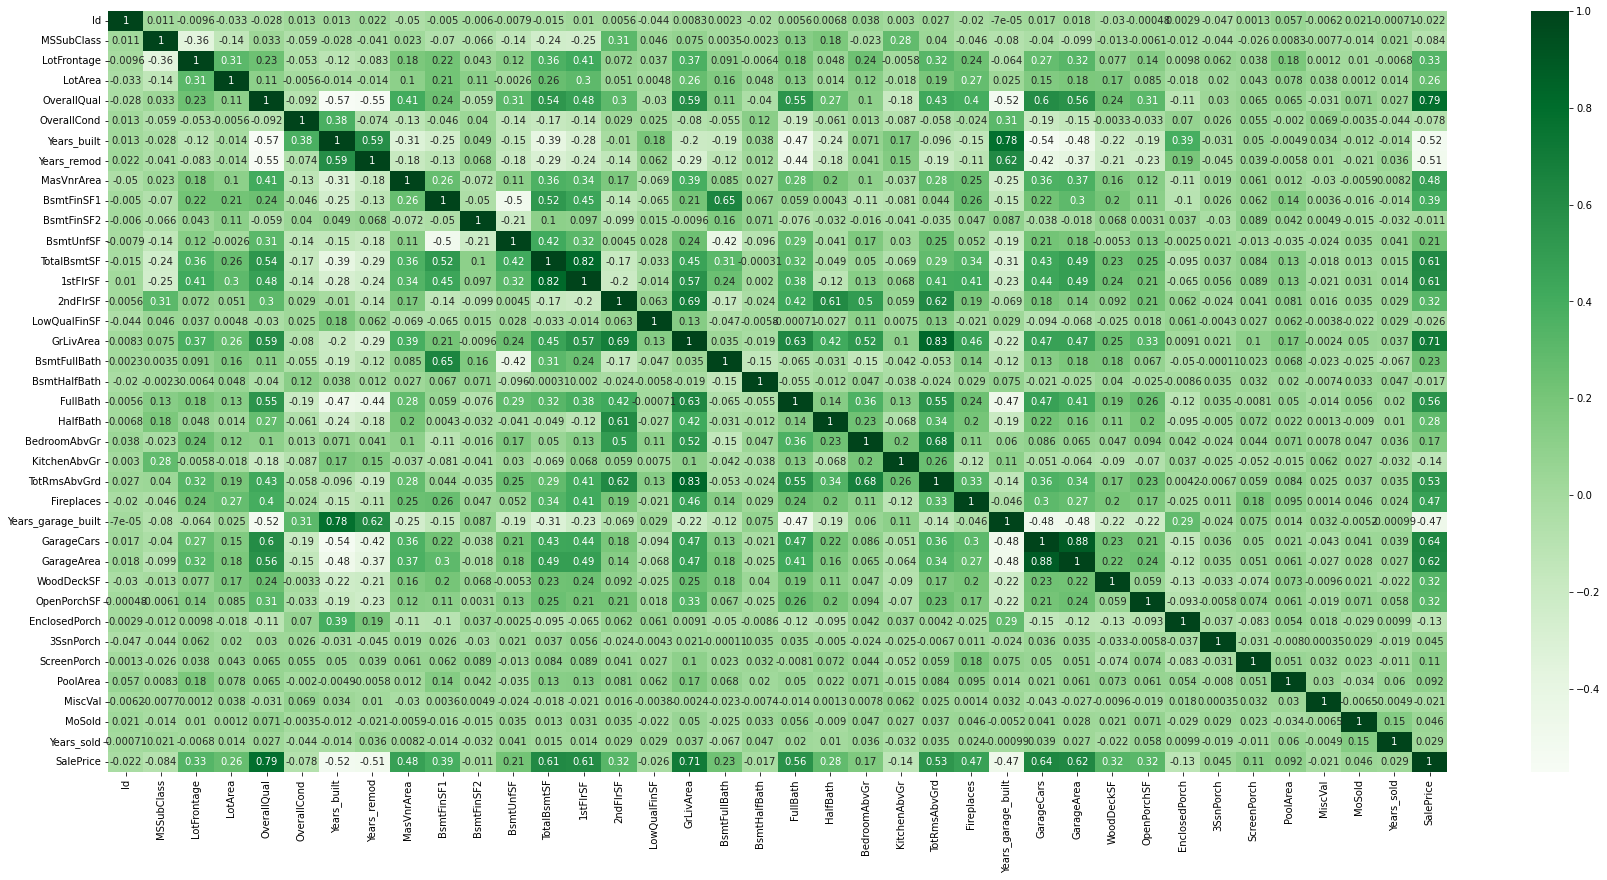

In [24]:
df_num=df.select_dtypes(include=['int64','float64']) 
plt.figure(figsize=[30,14])                            # heatmap for visualizing correlation analysis.
sns.heatmap(df_num.corr(),cmap='Greens',annot=True)
plt.show()

### Displaying the columns which has weak relationship with the target variable:

In [25]:
 # these columns are not so helpful because they won't explain the change in the target variable.
col=[]                      
for i in df_num.columns:   
    if abs(df_num[i].corr(df['SalePrice']))<0.15:
        col.append(i)
col

['Id',
 'MSSubClass',
 'OverallCond',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Years_sold']

In [26]:
# we can drop these columns from the dataset.
df_num.drop(col,axis=1,inplace=True)  
df.drop(col,axis=1,inplace=True)  

In [27]:
df.head(5)

,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,Years_built,...,Fireplaces,GarageType,Years_garage_built,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice
0,RL,65.00000,8450,Reg,Inside,CollgCr,1Fam,2Story,7,17,...,0,Attchd,17.00000,RFn,2,548,0,61,Normal,208500
1,RL,80.00000,9600,Reg,FR2,Veenker,1Fam,1Story,6,44,...,1,Attchd,44.00000,RFn,2,460,298,0,Normal,181500
2,RL,68.00000,11250,IR1,Inside,CollgCr,1Fam,2Story,7,19,...,1,Attchd,19.00000,RFn,2,608,0,42,Normal,223500
3,RL,60.00000,9550,IR1,Corner,Crawfor,1Fam,2Story,7,105,...,1,Detchd,22.00000,Unf,3,642,0,35,Abnorml,140000
4,RL,84.00000,14260,IR1,FR2,NoRidge,1Fam,2Story,8,20,...,1,Attchd,20.00000,RFn,3,836,192,84,Normal,250000



# Data Visualization:

In [28]:
df_num.head(5)

,LotFrontage,LotArea,OverallQual,Years_built,Years_remod,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,Years_garage_built,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.00000,8450,7,17,17,196.00000,706,150,856,856,...,1,3,8,0,17.00000,2,548,0,61,208500
1,80.00000,9600,6,44,44,0.00000,978,284,1262,1262,...,0,3,6,1,44.00000,2,460,298,0,181500
2,68.00000,11250,7,19,18,162.00000,486,434,920,920,...,1,3,6,1,19.00000,2,608,0,42,223500
3,60.00000,9550,7,105,50,0.00000,216,540,756,961,...,0,3,7,1,22.00000,3,642,0,35,140000
4,84.00000,14260,8,20,20,350.00000,655,490,1145,1145,...,1,4,9,1,20.00000,3,836,192,84,250000


In [29]:
# since we have 24 numerical columns to visualize we should break them into 4 parts.
# we included target variable in each part
df_num1=df_num.iloc[:,0:6]
df_num1['SalePrice']=df_num['SalePrice']
df_num2=df_num.iloc[:,6:12]
df_num2['SalePrice']=df_num['SalePrice']
df_num3=df_num.iloc[:,12:18]
df_num3['SalePrice']=df_num['SalePrice']
df_num4=df_num.iloc[:,18:]

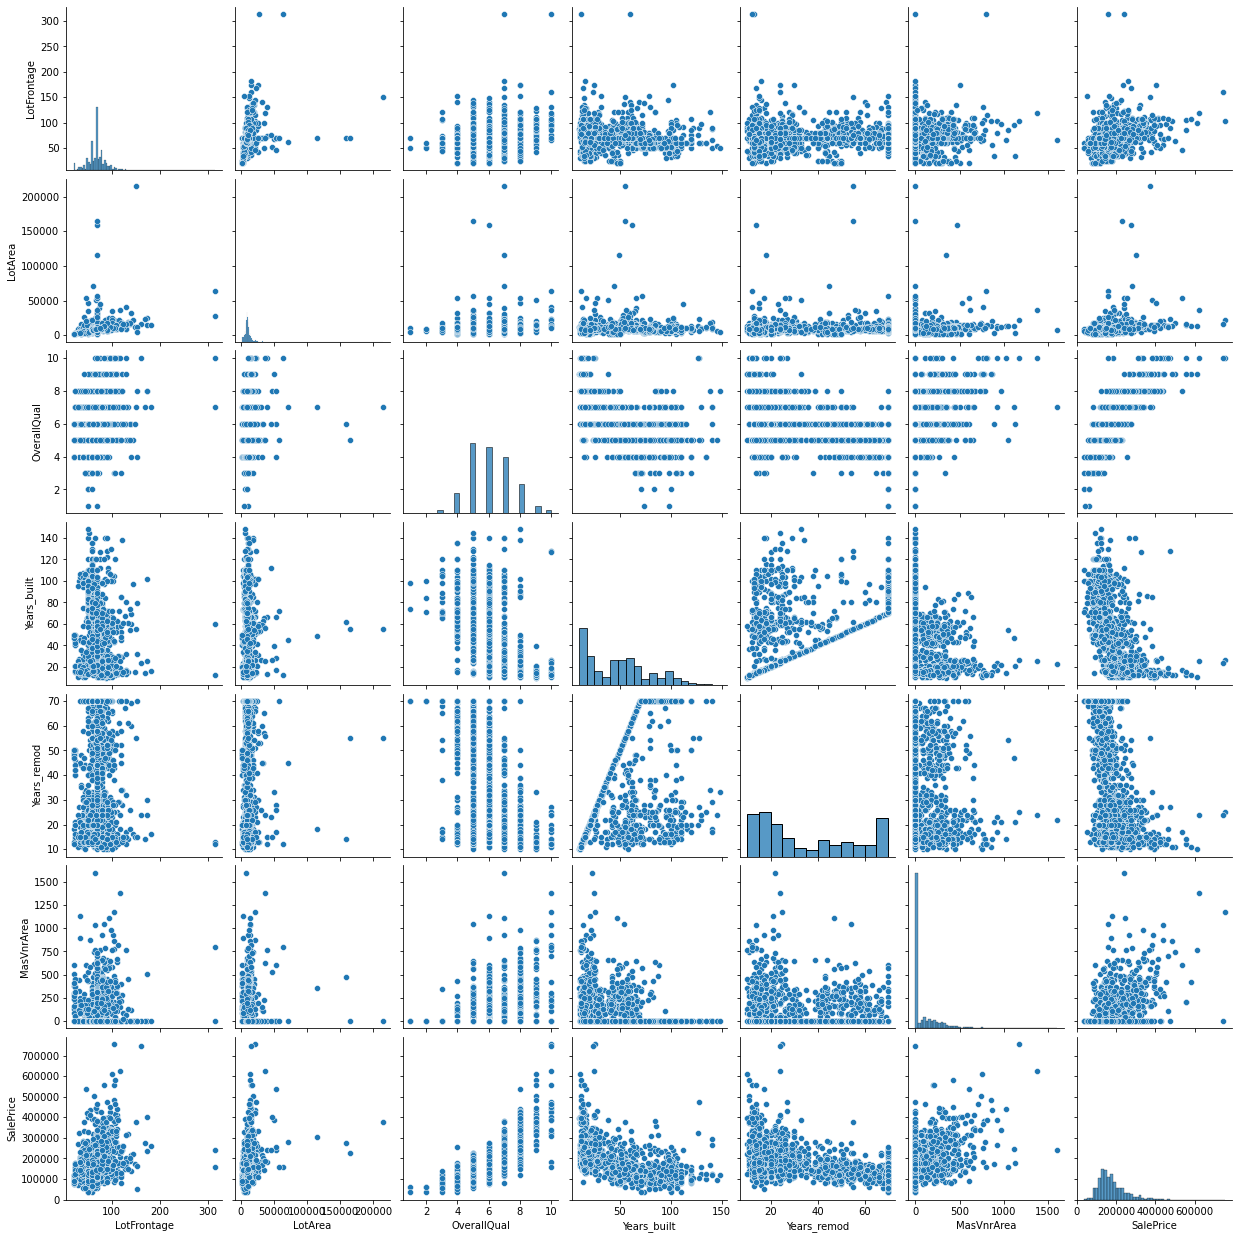

In [30]:
sns.pairplot(df_num1)
plt.show()

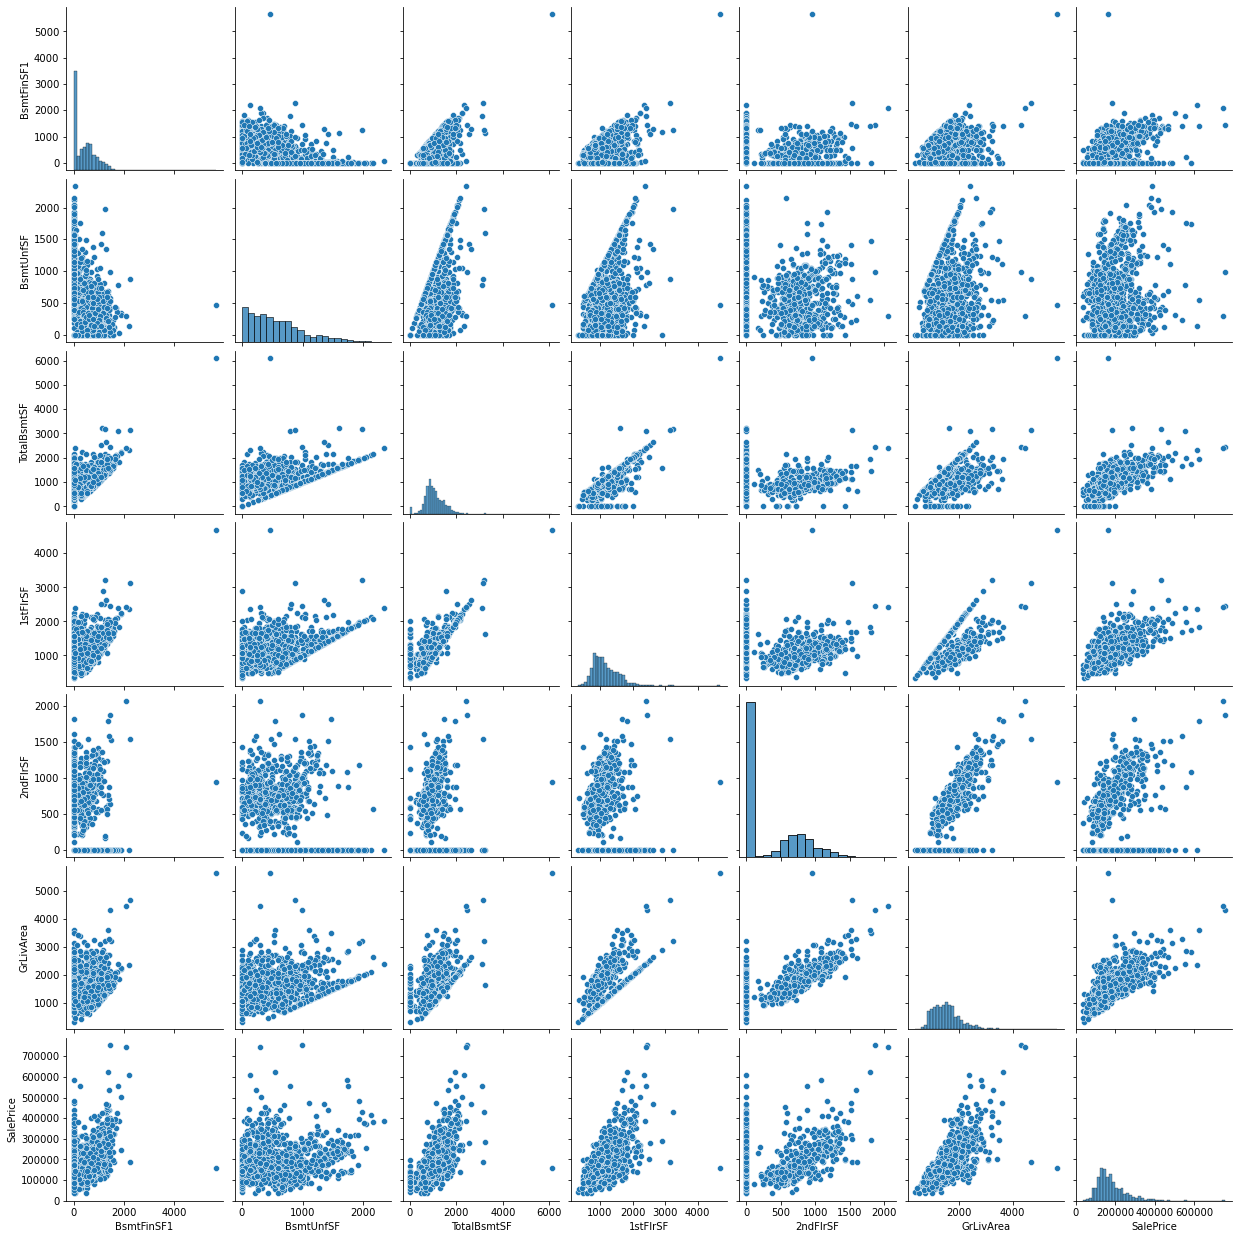

In [31]:
sns.pairplot(df_num2)
plt.show()

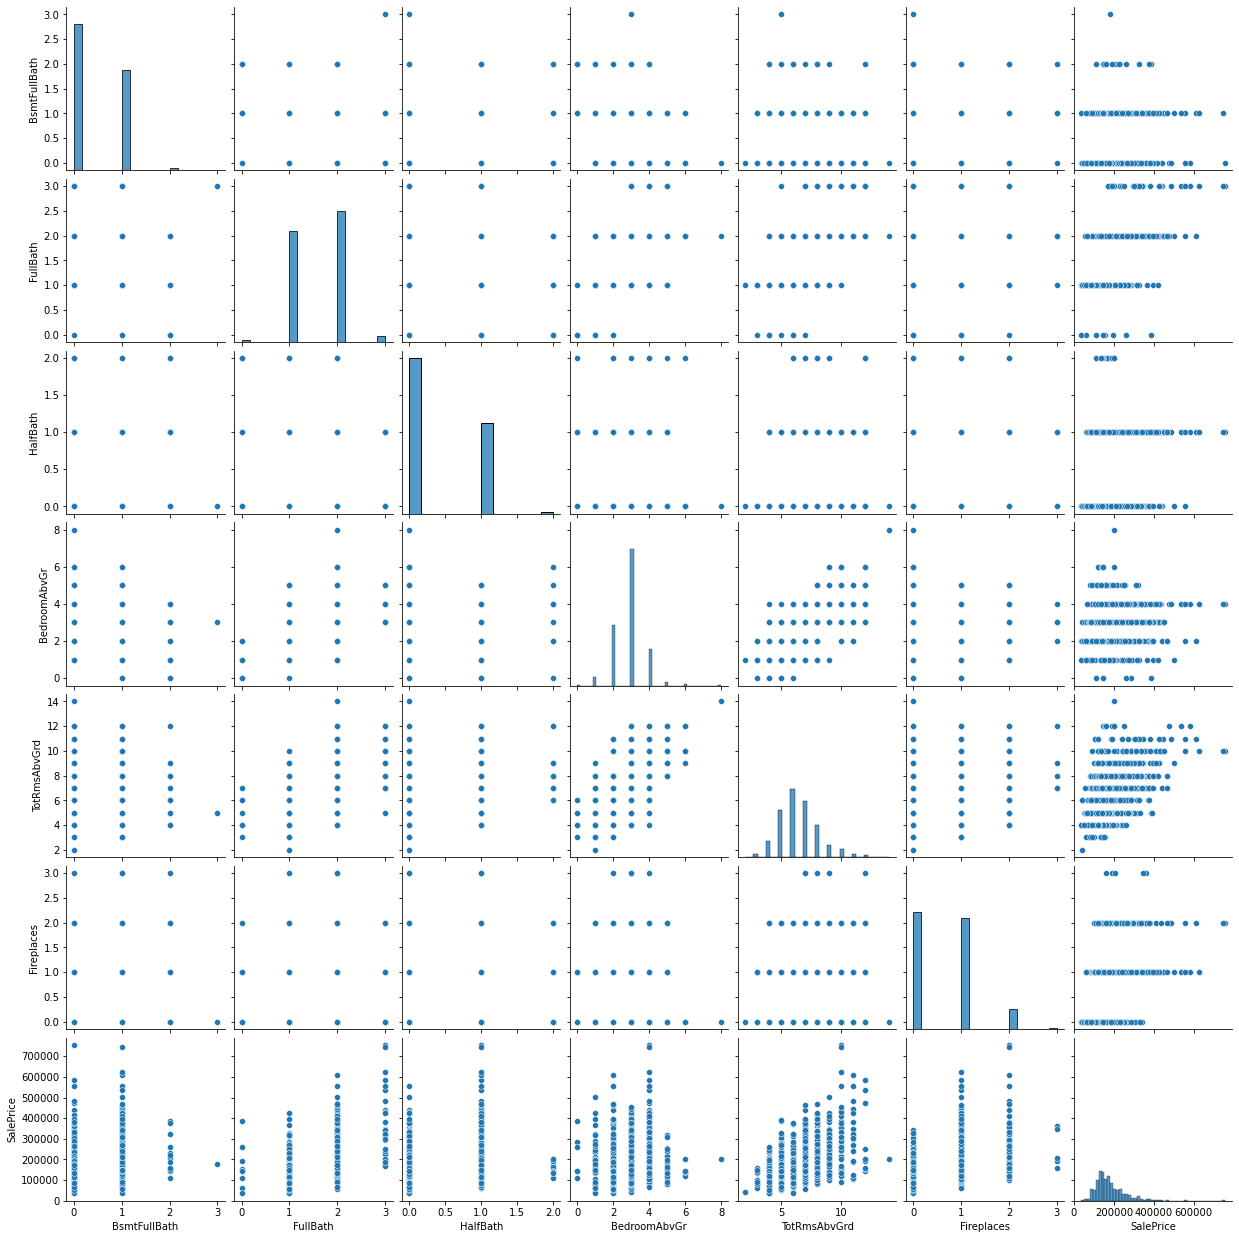

In [32]:
sns.pairplot(df_num3)
plt.show()

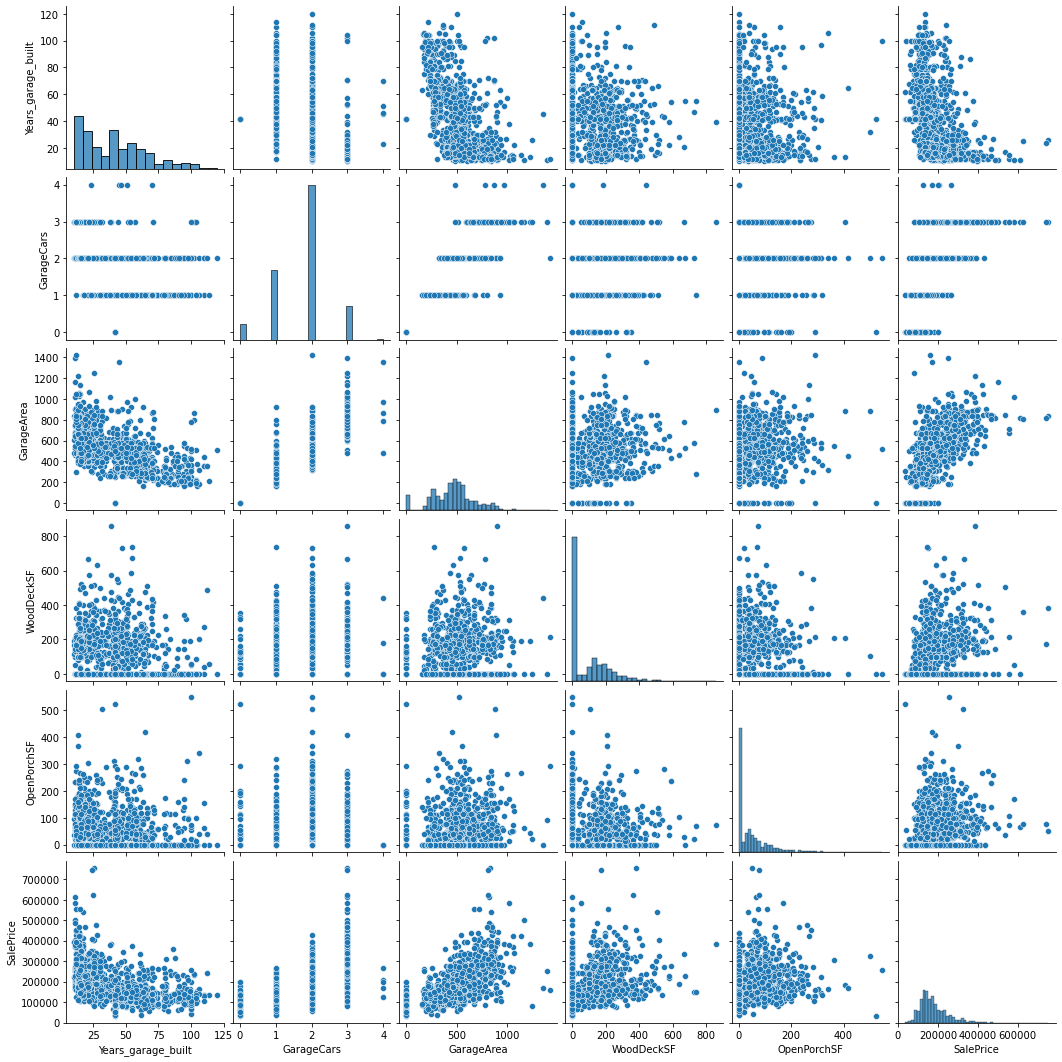

In [33]:
sns.pairplot(df_num4)
plt.show()

## Checking Target Variable:

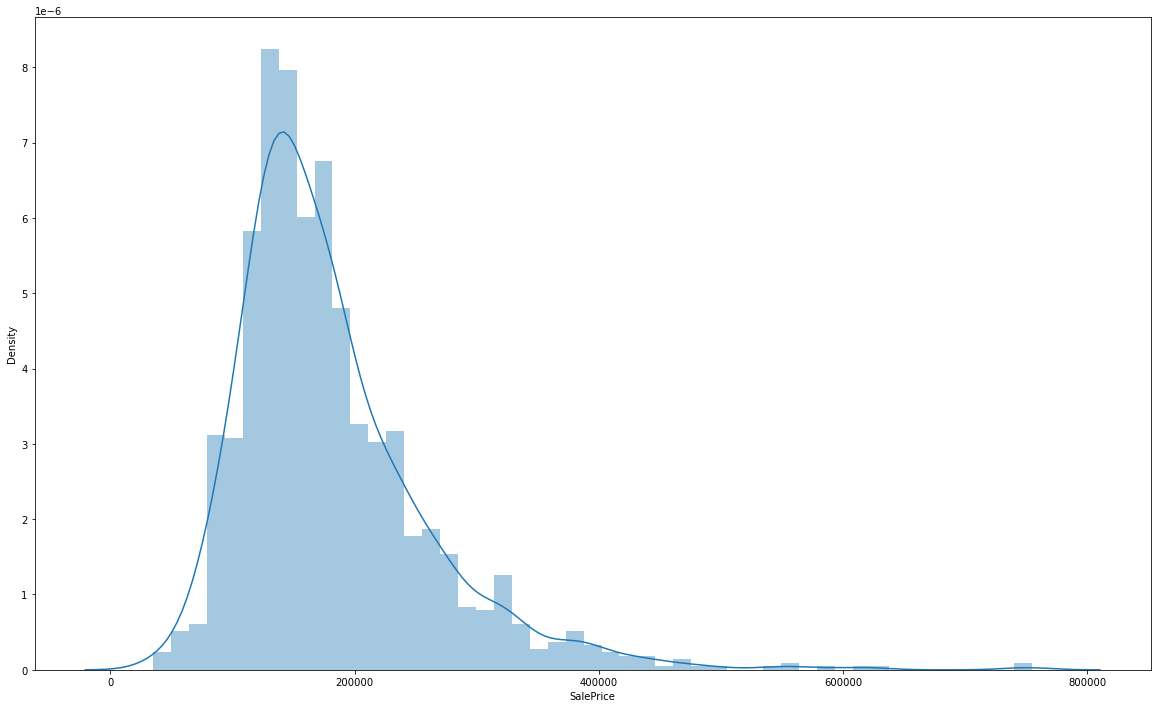

In [34]:
plt.figure(figsize=[20,12])
sns.distplot(df['SalePrice'])
plt.show()      # plotting the distribution of target variable.

In [35]:
df['SalePrice'] = np.log2(df['SalePrice'])   # performing log transformation.

In [36]:
df['SalePrice'].head()

0   17.66969
1   17.46961
2   17.76992
3   17.09507
4   17.93157
Name: SalePrice, dtype: float64

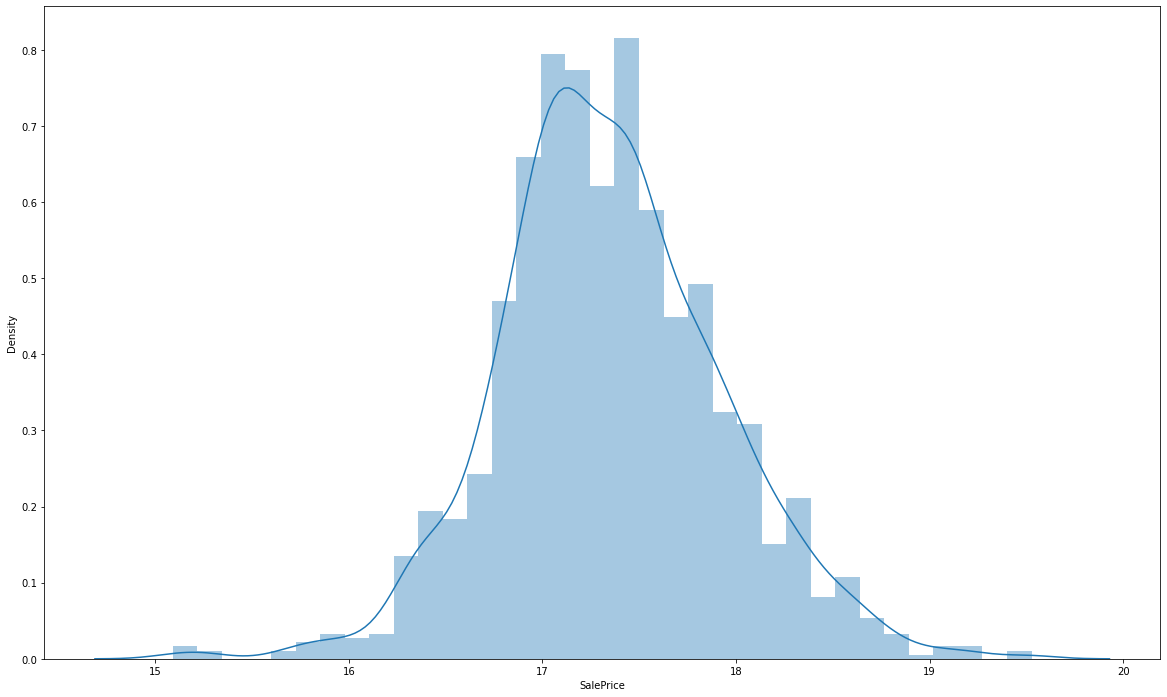

In [37]:
plt.figure(figsize=[20,12])
sns.distplot(df['SalePrice'])
plt.show()

# Data Preparation:

## Dummy variables:

In [38]:
df_obj.head() # Now we add dummy variables so that categorical columns can be included in the model.

,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleCondition
0,RL,Reg,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,Attchd,RFn,Normal
1,RL,Reg,FR2,Veenker,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,Attchd,RFn,Normal
2,RL,IR1,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,Attchd,RFn,Normal
3,RL,IR1,Corner,Crawfor,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Detchd,Unf,Abnorml
4,RL,IR1,FR2,NoRidge,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,Attchd,RFn,Normal


In [39]:
dummies=pd.get_dummies(df_obj,columns=df_obj.columns, drop_first = True)

# Here we created dummy variables for all categorical columns.

In [40]:
dummies.head()         # dummies data frame

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [41]:
df = pd.concat([df, dummies], axis = 1)    # concating the original and dummies data frames.

In [42]:
df.head()

,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,Years_built,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,RL,65.00000,8450,Reg,Inside,CollgCr,1Fam,2Story,7,17,...,0,0,0,1,0,0,0,0,1,0
1,RL,80.00000,9600,Reg,FR2,Veenker,1Fam,1Story,6,44,...,0,0,0,1,0,0,0,0,1,0
2,RL,68.00000,11250,IR1,Inside,CollgCr,1Fam,2Story,7,19,...,0,0,0,1,0,0,0,0,1,0
3,RL,60.00000,9550,IR1,Corner,Crawfor,1Fam,2Story,7,105,...,0,0,1,0,1,0,0,0,0,0
4,RL,84.00000,14260,IR1,FR2,NoRidge,1Fam,2Story,8,20,...,0,0,0,1,0,0,0,0,1,0


In [43]:
df.drop(df_obj.columns,axis=1,inplace=True)        # removing the redundant columns.

In [44]:
df.head()                                        # final data set after creating dummy variables.b

,LotFrontage,LotArea,OverallQual,Years_built,Years_remod,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.00000,8450,7,17,17,196.00000,706,150,856,856,...,0,0,0,1,0,0,0,0,1,0
1,80.00000,9600,6,44,44,0.00000,978,284,1262,1262,...,0,0,0,1,0,0,0,0,1,0
2,68.00000,11250,7,19,18,162.00000,486,434,920,920,...,0,0,0,1,0,0,0,0,1,0
3,60.00000,9550,7,105,50,0.00000,216,540,756,961,...,0,0,1,0,1,0,0,0,0,0
4,84.00000,14260,8,20,20,350.00000,655,490,1145,1145,...,0,0,0,1,0,0,0,0,1,0


In [45]:
col_name=[] 
corr=[]

# Out of 145 columns we are trying to figure out the columns which are significantly correlated with target variable.

for i in df.columns:
    col_name.append(i)
    corr.append(df[i].corr(df['SalePrice']))
    
    
corr_df=pd.DataFrame({'Column_name':col_name,'Correlation':corr})
# here we made a dataframe with column names and correlation as its columns.

corr_df=corr_df.sort_values(by='Correlation',ascending=False)
# sorting the columns with respect to correlation values in descending order.

print(corr_df.head())

    Column_name  Correlation
23    SalePrice      1.00000
2   OverallQual      0.81718
11    GrLivArea      0.70093
19   GarageCars      0.68062
20   GarageArea      0.65089


In [46]:
len(corr_df[abs(corr_df['Correlation'])>=0.15000]) 
corr_df_final=corr_df[abs(corr_df['Correlation'])>=0.15000]

In [47]:
col=list(corr_df_final['Column_name'])
df_final=df[col]    # Now we drop the columns which are not strongly correlated with target variable.
df_final.head()    # This is the final dataset that we are going to use to build a model.

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,Foundation_PConc,...,MSZoning_RM,MasVnrType_None,GarageType_Detchd,Years_garage_built,KitchenQual_TA,BsmtQual_TA,Years_remod,GarageFinish_Unf,Years_built,ExterQual_TA
0,17.66969,7,1710,2,548,856,856,2,8,1,...,0,0,0,17.00000,0,0,17,0,17,0
1,17.46961,6,1262,2,460,1262,1262,2,6,0,...,0,1,0,44.00000,1,0,44,0,44,1
2,17.76992,7,1786,2,608,920,920,2,6,1,...,0,0,0,19.00000,0,0,18,0,19,0
3,17.09507,7,1717,3,642,756,961,1,7,0,...,0,1,1,22.00000,0,1,50,1,105,1
4,17.93157,8,2198,3,836,1145,1145,2,9,1,...,0,0,0,20.00000,0,0,20,0,20,0


## Train-Test data split:

In [48]:
# We specify random seed as 42 so that we can get the same result after executing the code again.
np.random.seed(42)
df_train, df_test = train_test_split(df_final, train_size = 0.7, test_size = 0.3, random_state = 100)

## Scaling:

In [49]:
col=df_train.select_dtypes(include=['float64','int64']).columns
col                                               # selecting the columns which are needed to be scaled.

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'MasVnrArea', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF',
       '2ndFlrSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF',
       'BedroomAbvGr', 'Years_garage_built', 'Years_remod', 'Years_built'],
      dtype='object')

In [50]:
scaler=MinMaxScaler()           # fitting the scaler with train data and transforming it.
df_train[col]=scaler.fit_transform(df_train[col])
df_train.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,Foundation_PConc,...,MSZoning_RM,MasVnrType_None,GarageType_Detchd,Years_garage_built,KitchenQual_TA,BsmtQual_TA,Years_remod,GarageFinish_Unf,Years_built,ExterQual_TA
210,0.33585,0.44444,0.08186,0.00000,0.00000,0.14141,0.11389,0.33333,0.18182,0,...,0,1,0,0.28631,1,1,1.00000,1,0.61594,1
318,0.65323,0.66667,0.42429,0.75000,0.46262,0.22046,0.23148,0.66667,0.54545,1,...,0,0,0,0.15455,0,0,0.28333,0,0.12319,0
239,0.38218,0.55556,0.20158,0.25000,0.15515,0.12029,0.09861,0.33333,0.36364,0,...,0,1,1,0.55455,1,1,1.00000,1,0.47101,1
986,0.39349,0.55556,0.23002,0.25000,0.17983,0.07938,0.14560,0.33333,0.18182,0,...,1,1,0,0.54545,0,1,0.11667,1,0.72464,1
1416,0.40844,0.33333,0.35588,0.50000,0.39492,0.12717,0.20231,0.66667,0.72727,1,...,1,1,1,0.35455,1,1,1.00000,1,0.90580,1


In [51]:
df_test[col]=scaler.transform(df_test[col]) # do not fit the test data to the scaler just use transform.
df_test.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,Foundation_PConc,...,MSZoning_RM,MasVnrType_None,GarageType_Detchd,Years_garage_built,KitchenQual_TA,BsmtQual_TA,Years_remod,GarageFinish_Unf,Years_built,ExterQual_TA
1436,0.40308,0.33333,0.08186,0.50000,0.37236,0.14141,0.11389,0.33333,0.18182,1,...,0,1,1,0.32727,1,1,0.65000,1,0.28261,1
57,0.56215,0.66667,0.24635,0.50000,0.39845,0.14075,0.11296,0.66667,0.36364,1,...,0,1,0,0.05455,0,0,0.10000,0,0.04348,0
780,0.52631,0.66667,0.15661,0.50000,0.28350,0.20245,0.20394,0.66667,0.27273,1,...,0,0,0,0.13636,1,0,0.23333,0,0.10870,1
382,0.58914,0.66667,0.26115,0.50000,0.45063,0.15368,0.13125,0.66667,0.45455,1,...,0,1,0,0.03636,0,0,0.06667,0,0.02899,0
1170,0.51693,0.55556,0.13067,0.25000,0.25247,0.17938,0.17269,0.33333,0.27273,0,...,0,1,0,0.30000,1,1,0.55000,0,0.23913,1


In [52]:
y_train = df_train.pop('SalePrice')
X_train = df_train                          # splitting train and test data sets into 
y_test = df_test.pop('SalePrice')
X_test = df_test

# Model building:

In [53]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,41))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [54]:
# converting the gridsearchCV results into a dataframe.
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.10572,0.01632,0.00259,0.00080,1,{'n_features_to_select': 1},0.67628,0.57061,0.71881,0.63991,...,0.47840,0.34941,40,0.64979,0.67338,0.64061,0.66252,0.08040,0.54134,0.23074
1,0.08916,0.00402,0.00259,0.00049,2,{'n_features_to_select': 2},0.68169,0.65274,0.77285,0.73401,...,0.68887,0.05968,39,0.72634,0.73095,0.70411,0.72638,0.69242,0.71604,0.01507
2,0.09295,0.00768,0.00199,0.00000,3,{'n_features_to_select': 3},0.67979,0.66293,0.78754,0.75501,...,0.72405,0.04648,38,0.73963,0.74068,0.71220,0.74807,0.72384,0.73288,0.01301
3,0.08133,0.00371,0.00160,0.00049,4,{'n_features_to_select': 4},0.64894,0.71776,0.80331,0.75858,...,0.74200,0.05447,37,0.75258,0.77022,0.75041,0.75452,0.75537,0.75662,0.00701
4,0.09275,0.01280,0.00199,0.00063,5,{'n_features_to_select': 5},0.63215,0.72143,0.83003,0.78678,...,0.75242,0.06953,36,0.75461,0.77070,0.77239,0.78364,0.76066,0.76840,0.01003


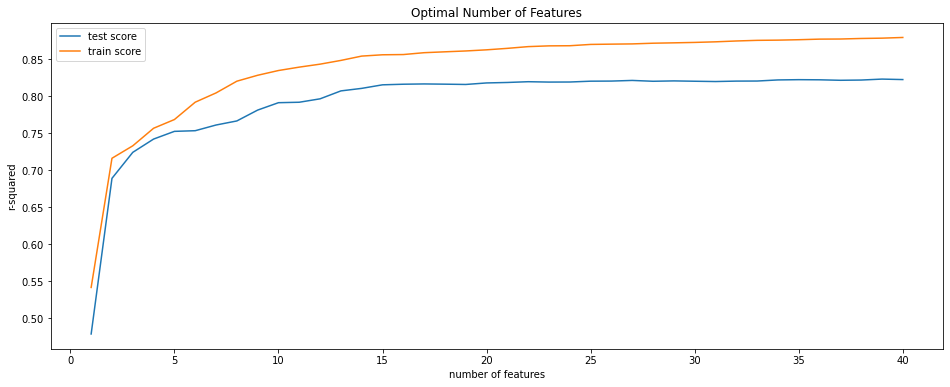

In [55]:
# plotting cv results tofind the best number of features to be used in the model.
plt.figure(figsize=(16,6))
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [56]:
lm=LinearRegression()
rfe=RFE(estimator=LinearRegression(),n_features_to_select=25)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=25)

In [57]:
col=X_train.columns[rfe.support_]
col

Index(['OverallQual', 'GarageCars', '1stFlrSF', 'Fireplaces', 'BsmtFinSF1',
       'Neighborhood_NridgHt', 'LotFrontage', 'BsmtQual_Gd', 'WoodDeckSF',
       '2ndFlrSF', 'MSZoning_RL', 'Neighborhood_NoRidge', 'GarageType_Attchd',
       'LotArea', 'BsmtFullBath', 'GarageType_BuiltIn', 'BedroomAbvGr',
       'Neighborhood_StoneBr', 'Neighborhood_Somerst', 'BsmtQual_Fa',
       'BsmtFinType1_Unf', 'Neighborhood_Edwards', 'GarageType_Detchd',
       'BsmtQual_TA', 'Years_remod'],
      dtype='object')

In [58]:
y_pred=rfe.predict(X_test)

In [59]:
X_train_rfe=X_train[col]
X_test_rfe=X_test[col]

## Homoscedasticity:

In [60]:
# Calculate residuals for test
residuals = y_test - y_pred

In [61]:
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.001828001250568641


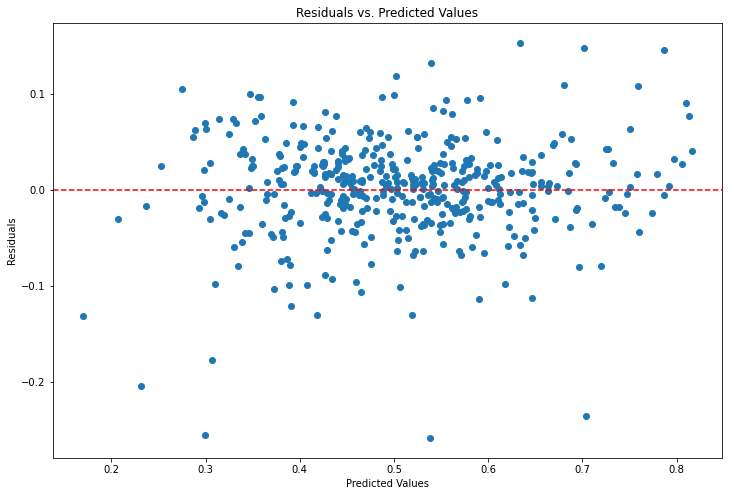

In [62]:
plt.figure(figsize=[12,8])
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

 We can see no particular pattern or relationship in the residuals plotted along with predicted values indicating have a constant variance (Homoscedasticity)...

# Checking for distribution of errors:

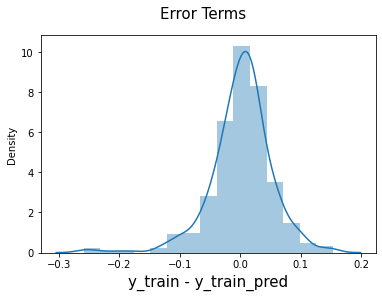

In [63]:
fig = plt.figure()
sns.distplot(residuals, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

We can confirm from the above the plot that the error terms are in a normal distribution with mean close to 0 and hence validating the assumptions of Linear Regression.

## Saving Coefficients for all the estimators:

In [64]:
learned_coeff=rfe.estimator_.coef_

coeff={}
for i in range(len(learned_coeff)):
    coeff[col[i]]=learned_coeff[i]
    
coeff_df=pd.DataFrame(coeff.items(),columns=['Feature','Linear Regression Learned Coefficient'])
coeff_df.head()

,Feature,Linear Regression Learned Coefficient
0,OverallQual,0.23859
1,GarageCars,0.09655
2,1stFlrSF,0.31874
3,Fireplaces,0.04789
4,BsmtFinSF1,-0.05700


# Ridge :

In [65]:
# list of alphas to tune for applying Ridge regression. we wil find the best value for alpha using GridsearchCV.
params = {'alpha': [0.001,0.005,0.0075,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.25,0.5]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.005, 0.0075, 0.01, 0.02, 0.03, 0.04,
                                   0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.25,
                                   0.5]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()  # converting the gridsearchCV results into a dataframe.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.00299,0.00063,0.00160,0.00048,0.00100,{'alpha': 0.001},-0.03119,-0.03588,-0.03687,-0.03163,...,-0.03362,0.00231,14,-0.03403,-0.02997,-0.03195,-0.03378,-0.03334,-0.03261,0.00151
1,0.00299,0.00000,0.00120,0.00040,0.00500,{'alpha': 0.005},-0.03119,-0.03588,-0.03686,-0.03163,...,-0.03362,0.00231,12,-0.03403,-0.02997,-0.03195,-0.03378,-0.03335,-0.03261,0.00151
2,0.00279,0.00040,0.00140,0.00049,0.00750,{'alpha': 0.0075},-0.03119,-0.03588,-0.03686,-0.03163,...,-0.03362,0.00231,11,-0.03403,-0.02997,-0.03195,-0.03378,-0.03335,-0.03262,0.00150
3,0.00240,0.00049,0.00139,0.00048,0.01000,{'alpha': 0.01},-0.03118,-0.03588,-0.03686,-0.03163,...,-0.03362,0.00231,10,-0.03403,-0.02998,-0.03195,-0.03378,-0.03335,-0.03262,0.00150
4,0.00225,0.00039,0.00122,0.00044,0.02000,{'alpha': 0.02},-0.03118,-0.03588,-0.03685,-0.03163,...,-0.03362,0.00230,9,-0.03403,-0.02998,-0.03194,-0.03378,-0.03335,-0.03262,0.00150


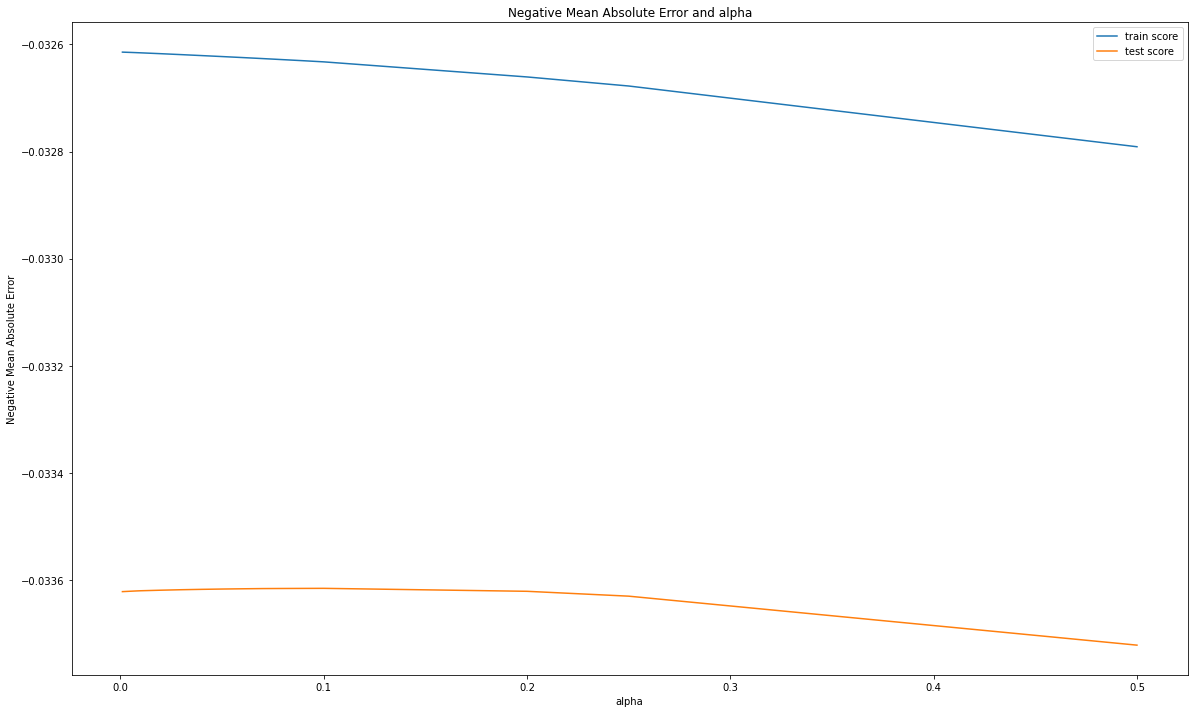

In [67]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting mean test and train scores with alpha 
plt.figure(figsize=[20,12])
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [68]:
alpha = 0.01
ridge = Ridge(alpha=alpha)
                                     # fitting ridge regression on our dataset with the best alpha value.
ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([ 0.23852252,  0.09662537,  0.31781931,  0.04799478, -0.05634585,
        0.02618542, -0.03216719, -0.02991315,  0.03257075,  0.11293271,
        0.04012792,  0.03199291,  0.03653571,  0.14435459,  0.05102299,
        0.03161009,  0.06380886,  0.02348067,  0.05042904, -0.04334572,
       -0.02565144, -0.03254975,  0.02439741, -0.04134084, -0.05442375])

In [69]:
lm = Ridge(alpha=0.25)
lm.fit(X_train_rfe, y_train)

# predicting the results for training and test dataset for ridge regression.
y_train_pred = lm.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_rfe)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8666752485802306
0.8493098293727488


In [70]:
# Get the learned coefficients
coefficients_ridge = ridge.coef_

coeff_df['Ridge Regression']=coefficients_ridge

coeff_df

,Feature,Linear Regression Learned Coefficient,Ridge Regression
0,OverallQual,0.23859,0.23852
1,GarageCars,0.09655,0.09663
2,1stFlrSF,0.31874,0.31782
3,Fireplaces,0.04789,0.04799
4,BsmtFinSF1,-0.05700,-0.05635
5,Neighborhood_NridgHt,0.02617,0.02619
6,LotFrontage,-0.03252,-0.03217
7,BsmtQual_Gd,-0.02990,-0.02991
8,WoodDeckSF,0.03252,0.03257
9,2ndFlrSF,0.11311,0.11293


# Lasso:

In [71]:
lasso = Lasso()

# # list of alphas to tune for applying Lasso regression. we wil find the best value for alpha using GridsearchCV.
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.005, 0.0075, 0.01, 0.02, 0.03, 0.04,
                                   0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.25,
                                   0.5]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()              # converting the gridsearchCV results into a dataframe.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.00299,0.00000,0.00160,0.00049,0.00100,{'alpha': 0.001},-0.03336,-0.03929,-0.04068,-0.03453,...,-0.03706,0.00277,1,-0.03774,-0.03520,-0.03563,-0.03724,-0.03759,-0.03668,0.00106
1,0.00299,0.00000,0.00100,0.00000,0.00500,{'alpha': 0.005},-0.04947,-0.05612,-0.05335,-0.04760,...,-0.05182,0.00299,2,-0.05181,-0.05091,-0.05066,-0.05231,-0.05230,-0.05160,0.00069
2,0.00239,0.00049,0.00140,0.00049,0.00750,{'alpha': 0.0075},-0.05910,-0.06441,-0.06018,-0.05647,...,-0.06059,0.00278,3,-0.06022,-0.05972,-0.05980,-0.06082,-0.06107,-0.06032,0.00054
3,0.00199,0.00000,0.00100,0.00000,0.01000,{'alpha': 0.01},-0.07035,-0.07389,-0.06887,-0.06771,...,-0.07101,0.00262,4,-0.07041,-0.07011,-0.07067,-0.07083,-0.07143,-0.07069,0.00044
4,0.00219,0.00040,0.00140,0.00049,0.02000,{'alpha': 0.02},-0.08836,-0.08756,-0.08386,-0.08191,...,-0.08616,0.00279,5,-0.08531,-0.08497,-0.08629,-0.08641,-0.08676,-0.08595,0.00069


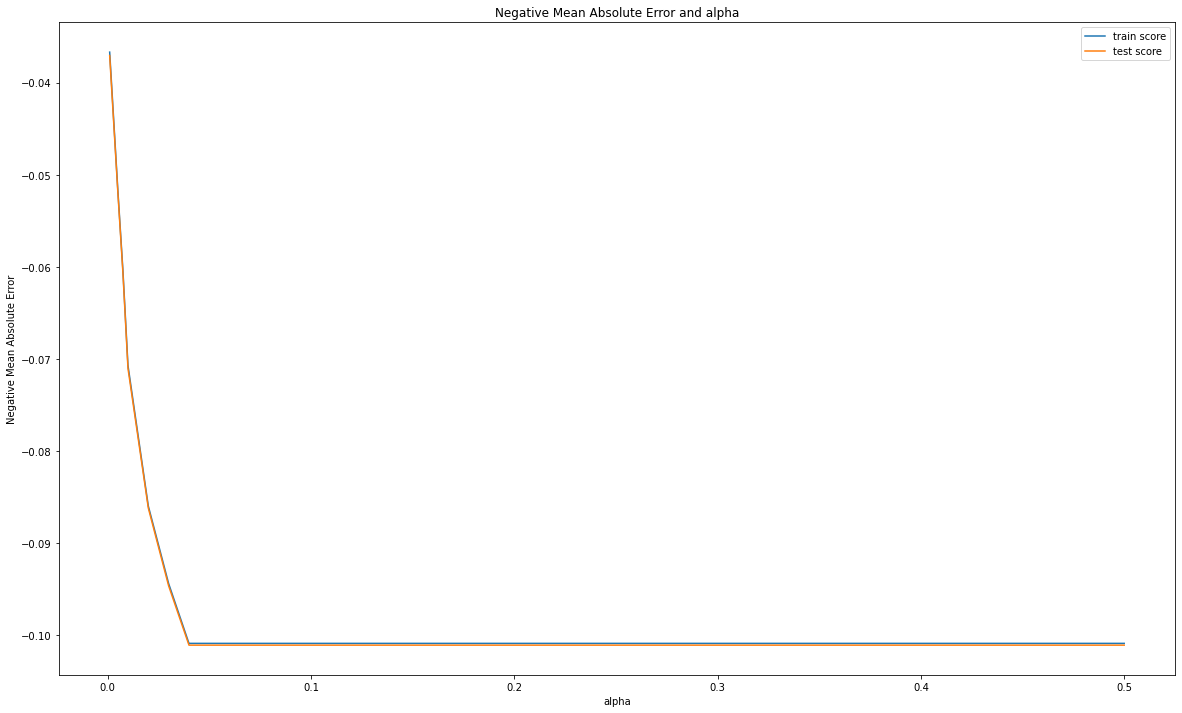

In [73]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting mean test and train scores with alpha 
plt.figure(figsize=[20,12])
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [74]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.001)

In [75]:
X_train_rfe.columns

Index(['OverallQual', 'GarageCars', '1stFlrSF', 'Fireplaces', 'BsmtFinSF1',
       'Neighborhood_NridgHt', 'LotFrontage', 'BsmtQual_Gd', 'WoodDeckSF',
       '2ndFlrSF', 'MSZoning_RL', 'Neighborhood_NoRidge', 'GarageType_Attchd',
       'LotArea', 'BsmtFullBath', 'GarageType_BuiltIn', 'BedroomAbvGr',
       'Neighborhood_StoneBr', 'Neighborhood_Somerst', 'BsmtQual_Fa',
       'BsmtFinType1_Unf', 'Neighborhood_Edwards', 'GarageType_Detchd',
       'BsmtQual_TA', 'Years_remod'],
      dtype='object')

In [76]:
lm = Lasso(alpha=0.001)
lm.fit(X_train_rfe, y_train)

y_train_pred = lm.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_rfe)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8426080705234402
0.8286533680099075


In [77]:
# Get the learned coefficients
coefficients_lasso = lasso.coef_

coeff_df['Lasso Regression']=coefficients_lasso

coeff_df

,Feature,Linear Regression Learned Coefficient,Ridge Regression,Lasso Regression
0,OverallQual,0.23859,0.23852,0.27715
1,GarageCars,0.09655,0.09663,0.11313
2,1stFlrSF,0.31874,0.31782,0.19394
3,Fireplaces,0.04789,0.04799,0.05779
4,BsmtFinSF1,-0.05700,-0.05635,0.00000
5,Neighborhood_NridgHt,0.02617,0.02619,0.01308
6,LotFrontage,-0.03252,-0.03217,0.00000
7,BsmtQual_Gd,-0.02990,-0.02991,-0.00302
8,WoodDeckSF,0.03252,0.03257,0.00909
9,2ndFlrSF,0.11311,0.11293,0.08942


We can see how Ridge regression shrink the coefficients of the estimators when compared to normal linear regression coefficents showing that Ridge regression is making the model more efficient by decreasing the complexity of the model. On the other hand, Lasso regression has shrunk some of the variable's coefficients to zero which means those variables do not effect the performance of the mode. In this way, Lasso regression can be used as a option for Feature Selection.